**Coursebook: Reshaping and Visualization**
- Part 3 of Data Analytics Specialization
- Course Length: 12 hours
- Last Updated: October 2021
___

- Author: [Samuel Chan](https://github.com/onlyphantom)
- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

## Top-Down Approach 

The coursebook is part of the **Data Analytics Specialization** offered by [Algoritma](https://algorit.ma). It takes a more accessible approach compared to Algoritma's core educational products, by getting participants to overcome the "how" barrier first, rather than a detailed breakdown of the "why". 

This translates to an overall easier learning curve, one where the reader is prompted to write short snippets of code in frequent intervals, before being offered an explanation on the underlying theoretical frameworks. Instead of mastering the syntactic design of the Python programming language, then moving into data structures, and then the `pandas` library, and then the mathematical details in an imputation algorithm, and its code implementation; we would do the opposite: Implement the imputation, then a succinct explanation of why it works and applicational considerations (what to look out for, what are assumptions it made, when _not_ to use it etc).

## Training Objectives

This coursebook is intended for participants who have completed the preceding courses offered in the **Data Analytics Developer Specialization**. This is the third course, **Reshaping and Visualization**.

The coursebook focuses on:
- Stacking and Unstacking
- Working with MultiIndex DataFrames
- Reshaping your DataFrame with Melt
- Using Group By Effectively
- Visual Data Exploratory

At the end of this course is a Learn by Building section, where you are expected to apply all that you've learned on a new dataset, and attempt the given questions.

# Reproducible Environment

There are some new packages we'll use in this material. Usually, we can use `pip install`/`conda install` to install new libraries to our environment. But for now, let's try on another approach on preparing libraries needed for a certain project.

Imagine you're working with your team on a collaborative project. You initialize the project with certain dependencies and versions on your computer and all goes well. Later on, you need to 'ship' that project to your team which requires them to set up the same environment as yours. What would you do then to make sure that program will also runs smoothly on their machine? 

This is where you need to make your environment reproducible by creating a `requirements.txt` file.

If you browse on `/assets` directory on this repository, you'll find a file called `requirements.txt`. This file is used for specifying what python packages are required to run a certain project. If you open up the file, you will see something that looks similar to this:


```
-----------------
matplotlib==3.5.0
numpy==1.21.4
pandas==1.3.4
yfinance==0.1.67
-----------------
```

Notice we have a line for each package, then a version number. This is important because as you start developing your python applications, you will develop the application with specific versions of the packages in mind. In simple, `requirements.txt` helps to keep track of what version of each package you are using to prevent unexpected changes.

## Importing Requirements

We have discussed what the requirement files is for but how do we use it? Since we don't want to manually install and track every package needed for a certain project, let's try to import the requirements with the following steps:

**Step 1**: Prepare your current new environment and activate it

```
conda activate <ENV_NAME>
```

**Step 2**: Navigate to the folder with your `requirements.txt`

```
cd <PATH_TO_REQUIREMENTS>
```

**Step 3**: Install the requirements

```
pip install -r requirements.txt
```

## Exporting Requirements

The `pip install` command always installs the latest published version of a package, but sometimes, you may want to install a specific version that you know works on your project.

Requirement files allow you to specify exactly which packages and versions should be installed. You can follow these steps to generate your requirement files:

**Step 1**: Activate desired environment

```
conda activate <ENV_NAME>
```

**Step 2**: Navigate to the folder where you want to save the `requirements.txt`
```
cd <PATH_TO_REQUIREMENTS_FOLDER>
```

**Step 3**: Freeze the environment

```
pip list --format=freeze > requirements.txt
```
The `freeze` command dumps all the packages and their versions to a standardized output. You can save it by any name you want but the convention is to name it as requirements.txt.

Now that you've discovered how to make your environment reproducible, we can back to our main focus of this week material; data reshaping and visualisation with pandas!

# Data Wrangling and Reshaping

In the previous two courses, we've got our hands on a few common techniques and learned how to explore data using `pandas` built-in methods. Specifically, we've  in the first and second part of this series how to use the following inspection, diagnostic and exploratory tools: 

**Data Inspection**
- `.head()` and `.tail()`
- `.describe()`
- `.shape` and `.size`
- `.axes`
- `.dtypes`
- Subsetting using `.loc`, `.iloc` and conditionals
---
**Diagnostic and Exploratory**
- Tables
- Cross-Tables and Aggregates
- Using `aggfunc` for aggregate functions
- Pivot Tables
- Working with DateTime
- Working with Categorical Data
- Duplicates and Missing Value Treatment

The first half of this course serves as an extension from the last. We'll pick up some new techniques to supplement our EDA toolset. Let us begin with reshaping techniques. 

In [1]:
import pandas as pd
import yfinance as data
pd.set_option('display.float_format', lambda x: '%.2f' % x) #display setting purpose only

In [2]:
symbol = ['AAPL', 'FB', 'GOOGL']
start_date = '2018-01-01'
end_date = '2022-01-01'
stock = data.download(symbol, start_date, end_date)
stock.columns.names = ['Attributes', 'Symbols']
stock.head()

[*********************100%***********************]  3 of 3 completed


Attributes Adj Close                Close                 High                 \
Symbols         AAPL     FB   GOOGL  AAPL     FB   GOOGL  AAPL     FB   GOOGL   
Date                                                                            
2018-01-02     41.19 181.42 1073.21 43.06 181.42 1073.21 43.08 181.58 1075.98   
2018-01-03     41.18 184.67 1091.52 43.06 184.67 1091.52 43.64 184.78 1096.10   
2018-01-04     41.37 184.33 1095.76 43.26 184.33 1095.76 43.37 186.21 1104.08   
2018-01-05     41.84 186.85 1110.29 43.75 186.85 1110.29 43.84 186.90 1113.58   
2018-01-08     41.69 188.28 1114.21 43.59 188.28 1114.21 43.90 188.90 1119.16   

Attributes   Low                 Open                    Volume            \
Symbols     AAPL     FB   GOOGL  AAPL     FB   GOOGL       AAPL        FB   
Date                                                                        
2018-01-02 42.31 177.55 1053.02 42.54 177.68 1053.02  102223600  18151900   
2018-01-03 42.99 181.33 1073.43 43.13 181.88 1073.93  118071600  16886600   
2018-01-04 43.02 184.10 1094.26 43.13 184.90 1097.09   89738400  13880900   
2018-01-05 43.26 184.93 1101.80 43.36 185.59 1103.45   94640000  13574500   
2018-01-08 43.48 186.33 1110.00 43.59 187.20 1111.00   82271200  17994700   

Attributes           
Symbols       GOOGL  
Date                 
2018-01-02  1588300  
2018-01-03  1565900  
2018-01-04  1302600  
2018-01-05  1512500  
2018-01-08  1232200

If you do not have the `pandas_datareader` module installed, or if you're following along this coursebook without an active connection, you can instead load it from the serialized object I stored in your `data_cache` folder. 

Creating the DataFrame object by reading from `pickle`:
- `stock = pd.read_pickle('data_cache/stock')`

Serializing the DataFrame object to a byte stream using `pickle`:
- `stock.to_pickle('data_cache/stock')`

In [3]:
# write dataframe into pickle
# stock.to_pickle('data_cache/stock')

<!--
import pickle
a = 12
f= open("haha","wb")
pickle.dump(a, f)
f.close()

f=open("haha", "rb")
b = pickle.load(f)
f.close()
-->

In [4]:
stock = pd.read_pickle('data_cache/stock')
stock.head()

Attributes Adj Close                Close                 High                 \
Symbols         AAPL     FB   GOOGL  AAPL     FB   GOOGL  AAPL     FB   GOOGL   
Date                                                                            
2018-01-02     41.25 181.42 1073.21 43.06 181.42 1073.21 43.08 181.58 1075.98   
2018-01-03     41.24 184.67 1091.52 43.06 184.67 1091.52 43.64 184.78 1096.10   
2018-01-04     41.43 184.33 1095.76 43.26 184.33 1095.76 43.37 186.21 1104.08   
2018-01-05     41.90 186.85 1110.29 43.75 186.85 1110.29 43.84 186.90 1113.58   
2018-01-08     41.75 188.28 1114.21 43.59 188.28 1114.21 43.90 188.90 1119.16   

Attributes   Low                 Open                    Volume            \
Symbols     AAPL     FB   GOOGL  AAPL     FB   GOOGL       AAPL        FB   
Date                                                                        
2018-01-02 42.31 177.55 1053.02 42.54 177.68 1053.02  102223600  18151900   
2018-01-03 42.99 181.33 1073.43 43.13 181.88 1073.93  118071600  16886600   
2018-01-04 43.02 184.10 1094.26 43.13 184.90 1097.09   89738400  13880900   
2018-01-05 43.26 184.93 1101.80 43.36 185.59 1103.45   94640000  13574500   
2018-01-08 43.48 186.33 1110.00 43.59 187.20 1111.00   82271200  17994700   

Attributes           
Symbols       GOOGL  
Date                 
2018-01-02  1588300  
2018-01-03  1565900  
2018-01-04  1302600  
2018-01-05  1512500  
2018-01-08  1232200

Notice how the data frame is a multi-index data frame. If you pay close attention, you can see a 2 levels of column axis: `Attributes` and `Symbols`. If you were to subset the data using square bracket, you will be accessing the highest level index:

In [5]:
# access attribute `High`
stock['High']

# Otherwise, this code will raise an error 
# stock['AAPL']

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,43.08,181.58,1075.98
2018-01-03,43.64,184.78,1096.10
2018-01-04,43.37,186.21,1104.08
2018-01-05,43.84,186.90,1113.58
2018-01-08,43.90,188.90,1119.16
...,...,...,...
2021-09-28,144.75,349.60,2781.93
2021-09-29,144.45,345.23,2743.02
2021-09-30,144.38,342.80,2710.85


Subsetting the `Close` column from the data frame will leave us with a single index column from the `Symbols` level.

**Dive Deeper:**

Create a DataFrame by subsetting only the `Close` columns. Name it `closingprice`. Then, use `.isna().sum()` to count the number of missing values in each of the columns present in `closingprice`.

If there are any missing values, use the `.fillna(method='ffill')` method to fill those missing values:

<!--
closingprice = stock['Close']
closingprice.isna().sum()
-->

In [6]:
## Write your solution code here 


If you pay close attention to the index of `stock`, you may already realized by now that there are days where no records were present. 2018-01-01, 2018-01-06, and 2018-01-07 were absent from our DataFrame because they happen to fall on weekends.

While the trading hours of [different stock markets differ](https://www.maybank-ke.com.sg/markets/markets-listing/trading-hours/) (the NYSE for example open its market floor from 9.30am to 4pm five days a week), on weekends as well as federal holidays all stock exchanges are closed for business.

We can create (or recreate) the index by passing in our own values. In the following cell we created a date range and create the index using that new date range:

In [7]:
pd.date_range(start="2019-01-01", end="2019-03-31")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

In [8]:
closingprice = stock['Close']
quarter1 = pd.date_range(start="2019-01-01", end="2019-03-31")
closingprice = closingprice.reindex(quarter1)
closingprice

Symbols,AAPL,FB,GOOGL
2019-01-01,NaN,NaN,NaN
2019-01-02,39.48,135.68,1054.68
2019-01-03,35.55,131.74,1025.47
2019-01-04,37.06,137.95,1078.07
2019-01-05,NaN,NaN,NaN
...,...,...,...
2019-03-27,47.12,165.87,1178.01
2019-03-28,47.18,165.55,1172.27
2019-03-29,47.49,166.69,1176.89
2019-03-30,NaN,NaN,NaN


Now use forward-fill to fill the `NA` values:

In [9]:
## Write your solution code here 

closingprice.ffill()

Symbols,AAPL,FB,GOOGL
2019-01-01,NaN,NaN,NaN
2019-01-02,39.48,135.68,1054.68
2019-01-03,35.55,131.74,1025.47
2019-01-04,37.06,137.95,1078.07
2019-01-05,37.06,137.95,1078.07
...,...,...,...
2019-03-27,47.12,165.87,1178.01
2019-03-28,47.18,165.55,1172.27
2019-03-29,47.49,166.69,1176.89
2019-03-30,47.49,166.69,1176.89


## `stack()` and `unstack()`

`stack()` stack the prescribed level(s) from columns to index and is particularly useful on DataFrames having a multi-level columns. It does so by "shifting" the columns to create new levels on its index. 

This is easier understood when we just see an example. Notice that `stock` has a 2-level column (Attributes and Symbols) and 1-level index (Date):

In [10]:
stock.head(10)

Attributes Adj Close                Close                 High                 \
Symbols         AAPL     FB   GOOGL  AAPL     FB   GOOGL  AAPL     FB   GOOGL   
Date                                                                            
2018-01-02     41.25 181.42 1073.21 43.06 181.42 1073.21 43.08 181.58 1075.98   
2018-01-03     41.24 184.67 1091.52 43.06 184.67 1091.52 43.64 184.78 1096.10   
2018-01-04     41.43 184.33 1095.76 43.26 184.33 1095.76 43.37 186.21 1104.08   
2018-01-05     41.90 186.85 1110.29 43.75 186.85 1110.29 43.84 186.90 1113.58   
2018-01-08     41.75 188.28 1114.21 43.59 188.28 1114.21 43.90 188.90 1119.16   
2018-01-09     41.74 187.87 1112.79 43.58 187.87 1112.79 43.76 188.80 1118.44   
2018-01-10     41.73 187.84 1110.14 43.57 187.84 1110.14 43.58 187.89 1112.78   
2018-01-11     41.97 187.77 1112.05 43.82 187.77 1112.05 43.87 188.40 1114.85   
2018-01-12     42.40 179.37 1130.65 44.27 179.37 1130.65 44.34 181.48 1131.30   
2018-01-16     42.19 178.39 1130.70 44.05 178.39 1130.70 44.85 181.75 1148.88   

Attributes   Low                 Open                    Volume            \
Symbols     AAPL     FB   GOOGL  AAPL     FB   GOOGL       AAPL        FB   
Date                                                                        
2018-01-02 42.31 177.55 1053.02 42.54 177.68 1053.02  102223600  18151900   
2018-01-03 42.99 181.33 1073.43 43.13 181.88 1073.93  118071600  16886600   
2018-01-04 43.02 184.10 1094.26 43.13 184.90 1097.09   89738400  13880900   
2018-01-05 43.26 184.93 1101.80 43.36 185.59 1103.45   94640000  13574500   
2018-01-08 43.48 186.33 1110.00 43.59 187.20 1111.00   82271200  17994700   
2018-01-09 43.35 187.10 1108.20 43.64 188.70 1118.44   86336000  12393100   
2018-01-10 43.25 185.63 1103.98 43.29 186.94 1107.00   95839600  10529900   
2018-01-11 43.62 187.38 1106.48 43.65 188.40 1112.31   74670800   9588600   
2018-01-12 43.91 177.40 1108.01 44.04 178.06 1110.10  101672400  77551300   
2018-01-16 44.03 178.04 1126.66 44.47 181.50 1140.31  118263600  36183800   

Attributes           
Symbols       GOOGL  
Date                 
2018-01-02  1588300  
2018-01-03  1565900  
2018-01-04  1302600  
2018-01-05  1512500  
2018-01-08  1232200  
2018-01-09  1340400  
2018-01-10  1036700  
2018-01-11  1121200  
2018-01-12  1929300  
2018-01-16  1823100

When we stack the `stock` DataFrame, we shrink the number of levels on its column by one: `stock` now has 1-level column named `Attributes`: 

In [11]:
stock.stack()

Attributes          Adj Close   Close    High     Low    Open     Volume
Date       Symbols                                                      
2018-01-02 AAPL         41.25   43.06   43.08   42.31   42.54  102223600
           FB          181.42  181.42  181.58  177.55  177.68   18151900
           GOOGL      1073.21 1073.21 1075.98 1053.02 1053.02    1588300
2018-01-03 AAPL         41.24   43.06   43.64   42.99   43.13  118071600
           FB          184.67  184.67  184.78  181.33  181.88   16886600
...                       ...     ...     ...     ...     ...        ...
2021-10-01 FB          343.01  343.01  345.02  338.64  341.61   14905300
           GOOGL      2730.86 2730.86 2738.21 2681.46 2688.95    1768000
2021-10-04 AAPL        139.14  139.14  142.21  138.27  141.76   98180300
           FB          326.23  326.23  335.94  322.70  335.53   42772900
           GOOGL      2673.19 2673.19 2719.21 2621.00 2719.21    2557900

[2838 rows x 6 columns]

`unstack()` does the opposite: it "shifts" the levels from index axis onto column axis. **Try and create a stack DataFrame, and then apply `unstack` on the new DataFrame to see it return to the original shape:**

In [12]:
## Write your code to try out .unstack() method here


**Dive Deeper**

Answer these following questions to ensure that you can continue for the next session:
1. How to swap the position (level) of Symbols and Attributes ? 
2. Based on your knowledge, what company (symbol) worth invest on ? (You may look on its fluctuations, means, etc)

<!--
# answer 1
stock.stack(level=0).unstack(level=1)

# answer 2
# Overal Growth Values
stock['Close'].iloc[-1,:] - stock['Close'].iloc[0,:]

# Oveal Growth Percentage
(stock['Close'].iloc[-1,:] - stock['Close'].iloc[0,:]) / stock['Close'].iloc[0,:]

# Standard Deviation 
stock['Close'].std() / stock['Close'].mean()

-->

In [13]:
# Write your solution code here 


**Knowledge Check:** Stack and Unstack

Which of the following statement is correct?

- [ ] `stack()` changes the DataFrame from wide to long
- [ ] `unstack()` changes the DataFrame from long to wide
- [ ] `unstack()` changes the DataFrame from wide to long

___

## Melt

Speaking of reshaping a DataFrame from wide format to long, another method that should be in your toolset is `melt()`. Consider the following DataFrame, which is created from `pandas` MultiIndex Slicers method, `.xs()` (Abbreviation for 'Cross Section'):

In [14]:
aapl = stock.xs(key = 'GOOGL', level='Symbols', axis=1)
aapl.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-02,1073.21,1073.21,1075.98,1053.02,1053.02,1588300
2018-01-03,1091.52,1091.52,1096.10,1073.43,1073.93,1565900
2018-01-04,1095.76,1095.76,1104.08,1094.26,1097.09,1302600
2018-01-05,1110.29,1110.29,1113.58,1101.80,1103.45,1512500
2018-01-08,1114.21,1114.21,1119.16,1110.00,1111.00,1232200


In [15]:
aapl.shape

(946, 6)

The DataFrame above is wide: it has 329 rows and 6 columns. The `melt()` function gathers all the columns into one and store the value corresponding to each column such that the resulting DataFrame has 329 * 6 = 1,974 rows, along with the identifier and values columns:

In [16]:
aapl_melted = aapl.melt()
aapl_melted

,Attributes,value
0,Adj Close,1073.21
1,Adj Close,1091.52
2,Adj Close,1095.76
3,Adj Close,1110.29
4,Adj Close,1114.21
...,...,...
5671,Volume,2288600.00
5672,Volume,1542400.00
5673,Volume,1899800.00
5674,Volume,1768000.00


In [17]:
aapl_melted.shape

(5676, 2)

**Knowledge Check :**
What's the difference betweent melt and stack ? 

We can optionally specify one or more columns to be identifier variables (`id_vars`), which treat all other columns as value variables (`value_vars`):

In [18]:
aapl.reset_index().melt(id_vars=['Date'])

,Date,Attributes,value
0,2018-01-02,Adj Close,1073.21
1,2018-01-03,Adj Close,1091.52
2,2018-01-04,Adj Close,1095.76
3,2018-01-05,Adj Close,1110.29
4,2018-01-08,Adj Close,1114.21
...,...,...,...
5671,2021-09-28,Volume,2288600.00
5672,2021-09-29,Volume,1542400.00
5673,2021-09-30,Volume,1899800.00
5674,2021-10-01,Volume,1768000.00


In [19]:
aapl.reset_index().melt(value_vars=['High', 'Low'])

,Attributes,value
0,High,1075.98
1,High,1096.10
2,High,1104.08
3,High,1113.58
4,High,1119.16
...,...,...
1887,Low,2707.20
1888,Low,2677.30
1889,Low,2671.12
1890,Low,2681.46


**Knowledge Check:** Missing Values

Given a data below, fill the missing values in `aapl` using appropriate method:

In [20]:
march = pd.date_range(start="2018-03-01", end="2019-03-31")
aapl = stock.xs('AAPL', level='Symbols', axis=1)
aapl = aapl.reindex(march)
aapl

Attributes,Adj Close,Close,High,Low,Open,Volume
2018-03-01,42.08,43.75,44.94,43.17,44.63,195208000.00
2018-03-02,42.37,44.05,44.08,43.11,43.20,153816000.00
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-05,42.51,44.21,44.44,43.63,43.80,113605600.00
...,...,...,...,...,...,...
2019-03-27,46.00,47.12,47.44,46.64,47.19,119393600.00
2019-03-28,46.06,47.18,47.39,46.88,47.24,83121600.00
2019-03-29,46.37,47.49,47.52,47.13,47.46,94256000.00
2019-03-30,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
## Write your code to fill the missing values in `aapl`


# Pandas and Matplotlib

Surely this is the point where a data analyst whip up some flashy charts using the popular `matplotlib` library? 

Well - yes. Even better, we're going to use the `DataFrame.plot()` method, built-into `pandas` which in turn calls `matplotlib` plotting functions under-the-hood. Notice that we added `matplotlib.pyplot` as an import, even though our code will not explicitly call `matplotlib` but rely on `pandas` implementation.

Now let's take a look at apple stock data frame:

In [22]:
aapl.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
2018-03-01,42.08,43.75,44.94,43.17,44.63,195208000.00
2018-03-02,42.37,44.05,44.08,43.11,43.20,153816000.00
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-05,42.51,44.21,44.44,43.63,43.80,113605600.00


The best way to demonstrate the efficiency gains of `DataFrame.plot()` is to see it in action. We will call `.plot()` directly on our `DataFrame` - `pandas` take care of the  matplotlib code that, [by matplotlib's own admission](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py), _can be daunting to many new users_.

In [23]:
stock

Attributes Adj Close                 Close                  High         \
Symbols         AAPL     FB   GOOGL   AAPL     FB   GOOGL   AAPL     FB   
Date                                                                      
2018-01-02     41.25 181.42 1073.21  43.06 181.42 1073.21  43.08 181.58   
2018-01-03     41.24 184.67 1091.52  43.06 184.67 1091.52  43.64 184.78   
2018-01-04     41.43 184.33 1095.76  43.26 184.33 1095.76  43.37 186.21   
2018-01-05     41.90 186.85 1110.29  43.75 186.85 1110.29  43.84 186.90   
2018-01-08     41.75 188.28 1114.21  43.59 188.28 1114.21  43.90 188.90   
...              ...    ...     ...    ...    ...     ...    ...    ...   
2021-09-28    141.91 340.65 2716.60 141.91 340.65 2716.60 144.75 349.60   
2021-09-29    142.83 339.61 2687.07 142.83 339.61 2687.07 144.45 345.23   
2021-09-30    141.50 339.39 2673.52 141.50 339.39 2673.52 144.38 342.80   
2021-10-01    142.65 343.01 2730.86 142.65 343.01 2730.86 142.92 345.02   
2021-10-04    139.14 326.23 2673.19 139.14 326.23 2673.19 142.21 335.94   

Attributes            Low                  Open                    Volume  \
Symbols      GOOGL   AAPL     FB   GOOGL   AAPL     FB   GOOGL       AAPL   
Date                                                                        
2018-01-02 1075.98  42.31 177.55 1053.02  42.54 177.68 1053.02  102223600   
2018-01-03 1096.10  42.99 181.33 1073.43  43.13 181.88 1073.93  118071600   
2018-01-04 1104.08  43.02 184.10 1094.26  43.13 184.90 1097.09   89738400   
2018-01-05 1113.58  43.26 184.93 1101.80  43.36 185.59 1103.45   94640000   
2018-01-08 1119.16  43.48 186.33 1110.00  43.59 187.20 1111.00   82271200   
...            ...    ...    ...     ...    ...    ...     ...        ...   
2021-09-28 2781.93 141.69 338.92 2707.20 143.25 347.97 2773.10  108972300   
2021-09-29 2743.02 142.03 338.88 2677.30 142.47 343.15 2739.60   74602000   
2021-09-30 2710.85 141.28 338.15 2671.12 143.66 340.45 2685.23   88934200   
2021-10-01 2738.21 139.11 338.64 2681.46 141.90 341.61 2688.95   94639600   
2021-10-04 2719.21 138.27 322.70 2621.00 141.76 335.53 2719.21   98180300   

Attributes                     
Symbols           FB    GOOGL  
Date                           
2018-01-02  18151900  1588300  
2018-01-03  16886600  1565900  
2018-01-04  13880900  1302600  
2018-01-05  13574500  1512500  
2018-01-08  17994700  1232200  
...              ...      ...  
2021-09-28  21710300  2288600  
2021-09-29  14452200  1542400  
2021-09-30  16547100  1899800  
2021-10-01  14905300  1768000  
2021-10-04  42772900  2557900  

[946 rows x 18 columns]

<AxesSubplot:xlabel='Date'>

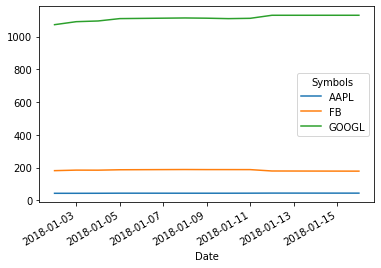

In [24]:
stock['Close'].head(10).plot()

We can [customize our plots with style sheets](https://matplotlib.org/users/style_sheets.html) but a handy reference is within reach. You can substitute 'default' for any one of the styles available and re-run the plotting code to see the styles being applied.

In [25]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('default')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Because the `.plot()` method is called on a DataFrame object, we can have an indexed DataFrame with multiple columns and `plot` will handle these using its default options:

<AxesSubplot:>

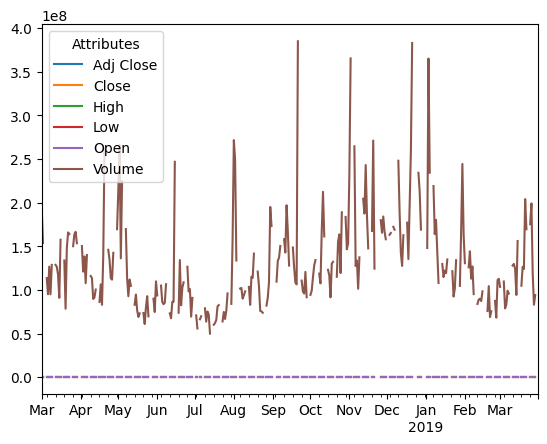

In [26]:
aapl.plot()

<AxesSubplot:>

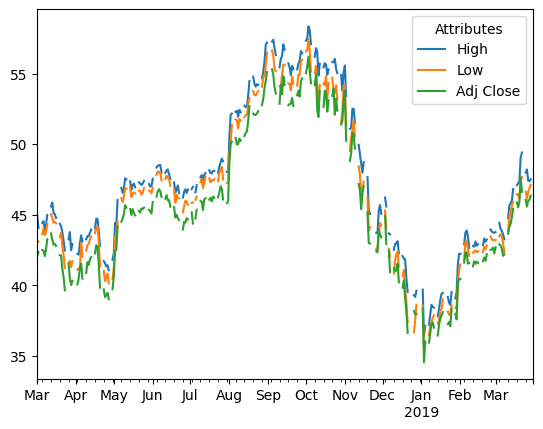

In [27]:
aapl.loc[:, ['High', 'Low', 'Adj Close']].plot()

## Other Visualization
one column visualization:
- `.plot.bar()` or `.plot.barh()` for bar plots
- `.plot.hist()` for histogram 
- `.plot.box()` or `.boxplot()` for boxplot
- `.plot.kde()` or `.plot.density()` for density plots
- `.plot.area()` for area plots 
- `.plot.pie()` for pie plots

two column visualization:
- `.plot.scatter()` for scatter plots
- `.plot.hexbin()` for hexagonal bin plots



# Group By

Reshaping data is an important component of any data wrangling toolkit as it allows the analyst to "massage" the data into the desired shape for further processing. 

Another equally important technique is the group by operation. Analysts having some experience with SQL or other data analysis toolsets (R's `tidyverse` for example) will find the group by operation a familiar strategy in many analysis-heavy workflow.

Consider the following DataFrame:

In [28]:
stock_adj = stock.stack()
stock_adj['Volume USD'] = stock_adj['Volume'] * stock_adj['Adj Close']
stock_adj = stock_adj.unstack()

In [29]:
volume = stock_adj.xs('Volume USD', level='Attributes', axis=1)
volume = volume.round(2)
volume

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,4216548021.56,3293117664.76,1704579380.96
2018-01-03,4869402249.11,3118448391.08,1709211198.58
2018-01-04,3718099512.82,2558666322.42,1427336988.72
2018-01-05,3965830237.73,2536395407.85,1679313684.08
2018-01-08,3434719032.89,3388042094.03,1372929513.87
...,...,...,...
2021-09-28,15464259492.07,7395613562.49,6217210983.50
2021-09-29,10655403796.60,4908111430.30,4144536873.44
2021-09-30,12584189300.00,5615920511.39,5079153333.11


Notice how the data frame shows amount of daily volume transaction, say we would like to compare the average daily transaction for AAPL, FB, and GOOGL. Let's perform a melting function:

In [30]:
volume_melted = volume.melt()
volume_melted

,Symbols,value
0,AAPL,4216548021.56
1,AAPL,4869402249.11
2,AAPL,3718099512.82
3,AAPL,3965830237.73
4,AAPL,3434719032.89
...,...,...
2833,GOOGL,6217210983.50
2834,GOOGL,4144536873.44
2835,GOOGL,5079153333.11
2836,GOOGL,4828160669.92


Supposed we would like to compare the average volume transaction between each stock price. On average, which of the 3 stocks has the highest average daily transaction volume?

<AxesSubplot:xlabel='Symbols'>

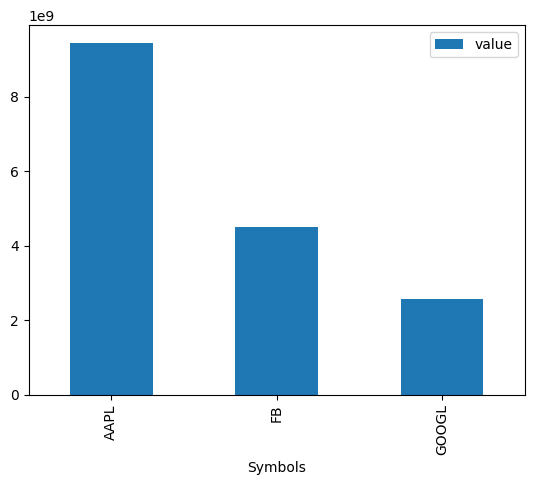

In [31]:
volume_melted.groupby(['Symbols']).mean().plot.bar()

## Visualizing Barchart for Comparison
    
Say we would like to compare the average daily volume sold from the companies. To do that, we will need to extract volume attribute from our dataframe, and perform a melt function:

<AxesSubplot:xlabel='Symbols'>

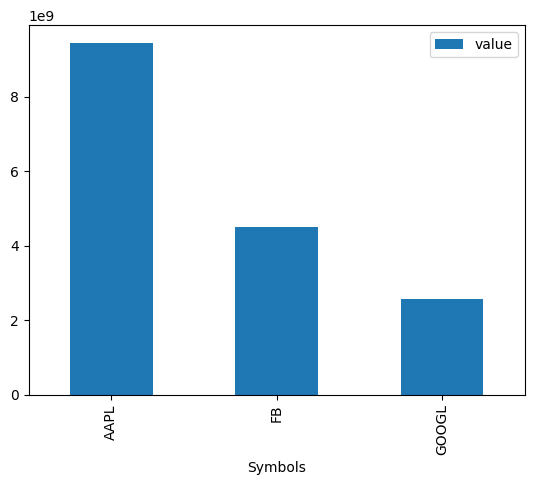

In [32]:
volume_melted.groupby('Symbols').mean().plot.bar()

If we were to compare the visualization to the numerical figure, it is far way easier to compare each stock's average volume. Now let's consider this following data frame:

In [33]:
aapl = stock.xs('AAPL', level='Symbols', axis=1)
aapl = aapl.round(2)
aapl['Close_Diff'] = aapl['Close'].diff()
aapl['Weekday'] = aapl.index.day_name()
aapl['Month'] = aapl.index.month_name()
aapl

Attributes,Adj Close,Close,High,Low,Open,Volume,Close_Diff,Weekday,Month
Date,,,,,,,,,
2018-01-02,41.25,43.06,43.08,42.31,42.54,102223600,NaN,Tuesday,January
2018-01-03,41.24,43.06,43.64,42.99,43.13,118071600,0.00,Wednesday,January
2018-01-04,41.43,43.26,43.37,43.02,43.13,89738400,0.20,Thursday,January
2018-01-05,41.90,43.75,43.84,43.26,43.36,94640000,0.49,Friday,January
2018-01-08,41.75,43.59,43.90,43.48,43.59,82271200,-0.16,Monday,January
...,...,...,...,...,...,...,...,...,...
2021-09-28,141.91,141.91,144.75,141.69,143.25,108972300,-3.46,Tuesday,September
2021-09-29,142.83,142.83,144.45,142.03,142.47,74602000,0.92,Wednesday,September
2021-09-30,141.50,141.50,144.38,141.28,143.66,88934200,-1.33,Thursday,September


Pay special attention to how the Close_Diff column was created. It's the difference between the Close value of a stock price on a given day and the following day.

Supposed we want to compare the Close_Diff between each Weekday; On average, does Tuesday record a higher difference between the Close price of Apple stock compared to a Thursday?

In [34]:
aapl.groupby('Weekday').mean()

Attributes,Adj Close,Close,High,Low,Open,Volume,Close_Diff
Weekday,,,,,,,
Friday,77.56,78.51,79.33,77.56,78.52,138210821.69,-0.07
Monday,77.92,78.86,79.66,77.70,78.58,127570146.93,0.30
Thursday,78.27,79.23,80.12,78.40,79.24,122426524.48,0.02
Tuesday,78.34,79.30,80.20,78.41,79.32,123647604.12,0.13
Wednesday,78.49,79.44,80.29,78.64,79.47,120455407.29,0.14


Now to create the same bar chart using `plot` function:

<AxesSubplot:xlabel='Weekday'>

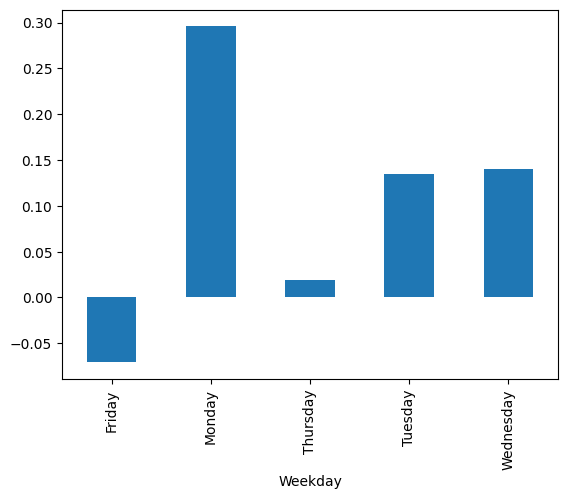

In [35]:
aapl.groupby('Weekday').mean()['Close_Diff'].plot.bar()

We can also improve our visualization efficiency by average transaction volume values in advance, so then the bars from our plot will be arranged based on the value, rather than the weekday's alphabetical order.

<AxesSubplot:xlabel='Weekday'>

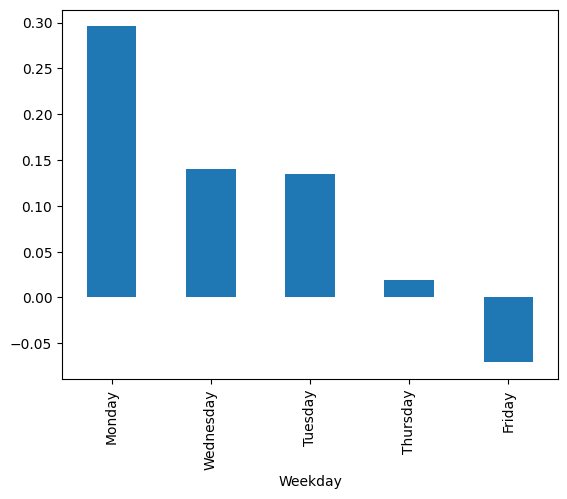

In [36]:
# aapl.groupby('Weekday').mean()['Close_Diff'].plot.bar()
aapl.groupby('Weekday').mean()['Close_Diff'].sort_values(ascending=False).plot.bar()

We can also created a manually ordered index by specifying the order of the day.

In [37]:
wday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

aapl_wday = aapl.groupby('Weekday').mean()['Close_Diff']

In [38]:
aapl_wday.index = pd.CategoricalIndex(aapl_wday.index,\
                                      categories=wday,\
                                      ordered=True)

<AxesSubplot:xlabel='Weekday'>

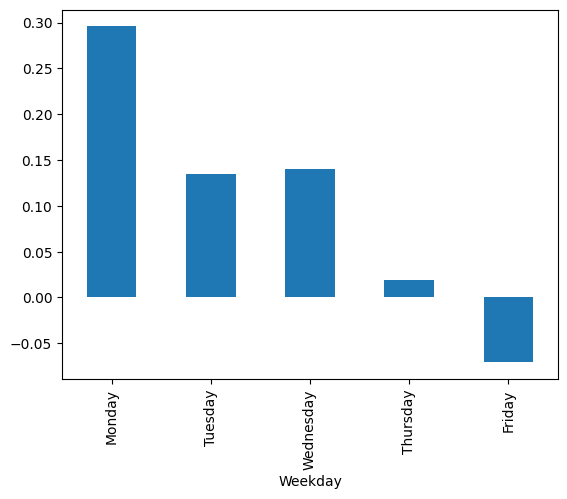

In [39]:
aapl_wday.sort_index().plot.bar()

## Using Grouped Barchart

Using `closingprice`,  we can try to visualize using a grouped barchart to compare each month's closing price for the first quarter of 2019 and compare it for the 3 stocks.

First, take a look at `closingprice` and make sure that the data has no missing values. If it has, fill it using appropriate method

In [40]:
closingprice.head()

Symbols,AAPL,FB,GOOGL
2019-01-01,NaN,NaN,NaN
2019-01-02,39.48,135.68,1054.68
2019-01-03,35.55,131.74,1025.47
2019-01-04,37.06,137.95,1078.07
2019-01-05,NaN,NaN,NaN


In [41]:
## Write your solution code here 

# Fill misssing value if any
closingprice = closingprice.ffill().bfill()

# Create new column called 'Month', denoting the month name of the date
closingprice['Month'] = closingprice.index.month_name()

In [42]:
closingprice

Symbols,AAPL,FB,GOOGL,Month
2019-01-01,39.48,135.68,1054.68,January
2019-01-02,39.48,135.68,1054.68,January
2019-01-03,35.55,131.74,1025.47,January
2019-01-04,37.06,137.95,1078.07,January
2019-01-05,37.06,137.95,1078.07,January
...,...,...,...,...
2019-03-27,47.12,165.87,1178.01,March
2019-03-28,47.18,165.55,1172.27,March
2019-03-29,47.49,166.69,1176.89,March
2019-03-30,47.49,166.69,1176.89,March


After we have the `Month` columns, let's group it by Month and see the resulting DataFrame

In [43]:
average_closing = closingprice.groupby('Month').mean()
average_closing

Symbols,AAPL,FB,GOOGL
Month,,,
February,42.80,164.60,1119.32
January,38.57,145.20,1082.76
March,45.80,166.88,1181.21


<AxesSubplot:xlabel='Month'>

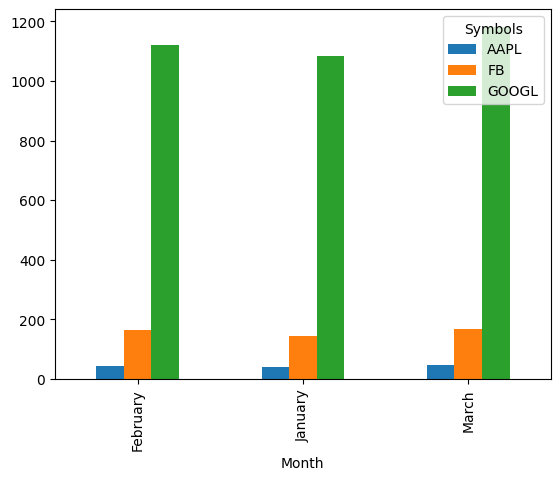

In [44]:
average_closing.sort_index().plot.bar()

However, if you want to reorder the month, we have to set the index as an ordered categorical values (See Exploratory Data Analysis materials if you need to recall). 

In [45]:
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

<AxesSubplot:xlabel='Month'>

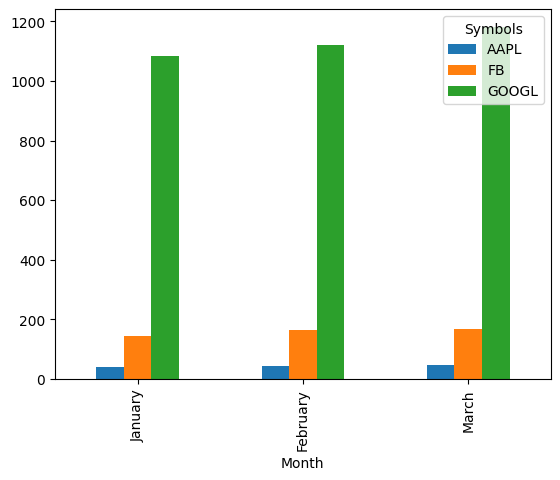

In [46]:
average_closing.index = pd.CategoricalIndex(average_closing.index,\
                                            categories=months,\
                                            ordered=True)

average_closing.sort_index().plot.bar()

A full reference to [the official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) on this method would be outside the scope of this coursebook, but is worth a read. 

## Combining `agg` and `groupby`

So far, we have explored several pandas aggregational toolkit, such as:
- `pd.crosstab()`
- `pd.pivot_table()`

In this chapter, we'll explore another pandas' aggregating tools:
- `groupby` aggregation.

**Disucission:**

(`pivot_table` & `pd.crosstab` equivalency)

The `pivot_table` method and the `crosstab` function can both produce the exact same results with the same shape. They both share the parameters; `index`, `columns`, `values`, and `aggfunc`. 

The major difference on the surface is that `crosstab` is a function and not a DataFrame method. This forces you to use columns as Series and not string names for the parameters.

1. Suppose you want to compare the number of total transactions over Weekdays of each quarter period. Create a `pivot_table` that solve the problem!


2. Try to reproduce the same result by using `crosstab`


3. What if, instead of compare the total transactions, you want to compare the total revenue from the same period? Use both `pivot_table` and `crosstab` as the solution. Discuss with your friend, which method is more relevant in this case?

Pay attention to the following group by operation:

In [47]:
stock.stack().reset_index().groupby('Symbols').mean()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,,,,,,
AAPL,78.12,79.07,79.93,78.15,79.03,126403665.64
FB,220.42,220.42,223.09,217.56,220.31,21194322.41
GOOGL,1483.25,1483.25,1497.46,1467.55,1482.35,1788145.14


In [48]:
stock.stack().reset_index().groupby('Symbols').agg({
    'Close': 'mean',
    'High': 'max',
    'Low': 'min'
})

Attributes,Close,High,Low
Symbols,,,
AAPL,79.07,157.26,35.50
FB,220.42,384.33,123.02
GOOGL,1483.25,2925.08,977.66


Say we would like to know a glimpse of the maximum stock price, minimum stock price, and the average of closing price from the 3 companies. To do that, we'll need to combine `groupby` with `agg` and map each column with its designated of the aggregation function.

<AxesSubplot:xlabel='Symbols'>

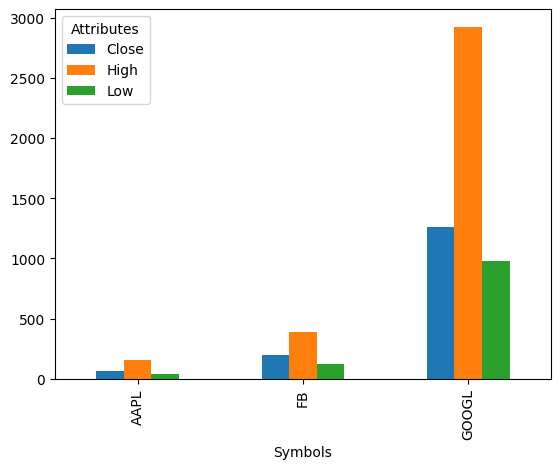

In [49]:
stock.stack().reset_index().groupby('Symbols').agg({
    'Close': 'median',
    'High': 'max',
    'Low': 'min'
}).plot.bar()

**Knowledge Check:** Using `plot`

Consider the following data frame:

In [50]:
import datetime

stock['YearMonth'] = pd.to_datetime(stock.index.date).to_period('M')
monthly_closing = stock.groupby('YearMonth').mean().loc[:,['Close','Low', 'High']]
monthly_closing.head()

Attributes Close                  Low                 High               
Symbols     AAPL     FB   GOOGL  AAPL     FB   GOOGL  AAPL     FB   GOOGL
YearMonth                                                                
2018-01    43.50 184.96 1139.39 43.20 182.92 1129.20 43.80 186.21 1144.58
2018-02    41.91 180.27 1091.88 41.37 177.76 1078.15 42.47 183.13 1107.95
2018-03    43.62 173.49 1093.77 43.27 170.51 1078.95 44.20 176.15 1110.95
2018-04    42.46 163.81 1039.95 42.07 161.55 1028.28 42.91 166.09 1054.32
2018-05    46.38 182.93 1074.85 45.97 180.95 1063.68 46.62 183.87 1082.16

Which of the following will be appropriate plot to use?

- [ ] Line plot -> .plot()
- [ ] Scatter plot -> .plot.scatter(x=? , y=?)
- [ ] Bar plot -> .plot.bar()
- [ ] Box plot -> .plot.box()

In [51]:
## Your code below
